In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [4]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
##model tahmin
gbm_model=GradientBoostingRegressor().fit(X_train,y_train)

In [6]:
gbm_model

GradientBoostingRegressor()

In [7]:
y_pred=gbm_model.predict(X_test)

In [8]:
np.sqrt(mean_squared_error(y_test,y_pred))

291.99126116374424

In [9]:
##model turing

In [10]:
gbm_model=GradientBoostingRegressor().fit(X_train,y_train)
gbm_model

GradientBoostingRegressor()

In [11]:
gbm_params={"learning_rate":[0.001,0.01,0.1,0.5],"max_depth":[3,5,8,10],"n_estimators":[100,200,500,1000],"subsample":[1,0.5,0.8],"loss":["ls","lad","quantile"]}



In [12]:
gbm_model=GradientBoostingRegressor().fit(X_train,y_train)

In [14]:
gbm_cv_model=GridSearchCV(gbm_model,gbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3840 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
716 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

In [15]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'quantile',
 'max_depth': 8,
 'n_estimators': 1000,
 'subsample': 0.5}

In [18]:
gbm_tuned=GradientBoostingRegressor(learning_rate=0.1,loss="quantile",max_depth=8,n_estimators=1000,subsample=0.5).fit(X_train,y_train)

In [19]:
y_pred=gbm_tuned(X_test)

TypeError: 'GradientBoostingRegressor' object is not callable

In [20]:
np.sqrt(mean_squared_error(y_test,y_pred))

291.99126116374424

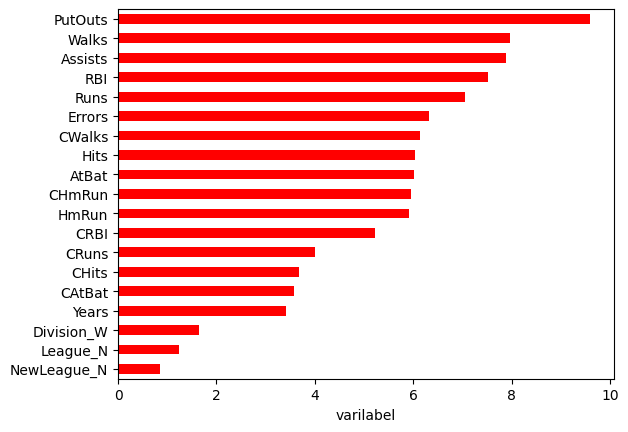

In [21]:
Importance=pd.DataFrame({"Importance":gbm_tuned.feature_importances_*100},index=X_train.columns)


Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",color="r",)

plt.xlabel("varilabel")
plt.gca().legend_=None